# <div align="center"><b>DETECCIONES ACTUALES IMAGENES - PROYECTO FINAL</b></div>

<div align="right">📝 <em><small><font color='Gray'>Nota:</font></small></em></div>

<div align="right"> <em><small><font color='Gray'> La funcionalidad de visualización de jupyter notebooks en <a href="https://github.com/" target="_blank">github</a> es solamente un preview.</font></small></em> </div>

<div align="right"> <em><small><font color='Gray'> Para mejor visualización se sugiere utilizar el visualizador recomendado por la comunidad: <a href="https://nbviewer.org/" target="_blank">nbviewer</a></font></small></em> </div>

<div align="right"> <em><small><font color='Gray'> Puedes a acceder al siguiente enlace para ver este notebook en dicha página: <a href="https://nbviewer.org/ruta/de/archivo.ipynb">Ruta archivo</a></font></small></em> </div>

* * *

<style>
/* Limitar la altura de las celdas de salida en html */
.jp-OutputArea.jp-Cell-outputArea {
    max-height: 500px;
}
</style>

🛻 <em><font color='MediumSeaGreen'>  Instalaciones: </font></em> 🛻

Este notebook utiliza [Poetry](https://python-poetry.org/) para la gestión de dependencias.
Primero instala Poetry siguiendo las instrucciones de su [documentación oficial](https://python-poetry.org/docs/#installation).
Luego ejecuta el siguiente comando para instalar las dependencias necesarias y activar el entorno virtual:

- Bash:
```bash
poetry install
eval $(poetry env activate)
```

- PowerShell:
```powershell
poetry install
Invoke-Expression (poetry env activate)
```

<!-- Descargar archivos adicionales:
!gdown https://drive.google.com/drive/folders/1UBZ8PEbtmiWMGkULu7GAt3VhUpeTy9l7?usp=sharing --folder -->

✋ <em><font color='DodgerBlue'>Importaciones:</font></em> ✋

In [1]:
import os, sys
import fiftyone as fo
from pathlib import Path

from dotenv import load_dotenv

load_dotenv("../.env.dev")

sys.path.append(os.path.abspath("../../modulo-IA/"))  # Se agrega utilidades generales del modulo IA
sys.path.append(os.path.abspath("../../modulo-apps"))  # Se agrega modulo-mini-apps

from apps_utils.logging import Logging
from apps_config.settings import Config
from apps_com_db.mongodb_client import MongoDB

import ia_utils.dataset_utils as DatasetUtils

from apps_com_s3.procesador_s3 import ProcesadorS3
import apps_etiquetado.procesador_coco_dataset as ProcesadorCocoDataset
import apps_etiquetado.utils_coco_dataset as UtilsCocoDataset
import apps_etiquetado.visualizador_coco_dataset as VisualizadorCocoDataset

🔧 <em><font color='tomato'>Configuraciones:</font></em> 🔧


In [2]:
CONFIG = Config().config_data
LOGGER = Logging().logger
DB = MongoDB().db

<div align="center">✨Datos del proyecto:✨</div>

<p></p>

<div align="center">

| Subtitulo       | Detecciones imagenes actuales - Proyecto final                                                                                                                |
| --------------- | -------------------------------------------------------------------------------------------------------------------------------------- |
| **Descrpción**  | Notebook que muestra el estado actual de los patches con anotaciones                                                                                                          |
| **Integrantes** | Bruno Masoller (brunomaso1@gmail.com)                                                                                                  |

</div>

In [3]:
imagenes_folder_path = Path("detecciones_imagenes_actuales")
# DatasetUtils.download_full_dataset(for_patches=False, folder_path=imagenes_folder_path)

In [ ]:
# TODO: Resolver porque no se muestran las imagenes
dataset_name = "detecciones-imagenes-actuales"
dataset = fo.Dataset.from_dir(
    dataset_type=fo.types.COCODetectionDataset,
    dataset_dir=imagenes_folder_path,
    overwrite=True,
    name=dataset_name,
)

 100% |███████████████████| 13/13 [331.7ms elapsed, 0s remaining, 39.4 samples/s]  


2025-05-19 18:32:44,717 - eta.core.utils - INFO - _draw -  100% |███████████████████| 13/13 [331.7ms elapsed, 0s remaining, 39.4 samples/s]  


In [5]:
session = fo.launch_app(dataset, auto=False)

Connected to FiftyOne on port 5151 at localhost.
If you are not connecting to a remote session, you may need to start a new session and specify a port


2025-05-19 18:32:46,755 - fiftyone.core.service - INFO - start - Connected to FiftyOne on port 5151 at localhost.
If you are not connecting to a remote session, you may need to start a new session and specify a port


Session launched. Run `session.show()` to open the App in a cell output.


2025-05-19 18:32:46,756 - fiftyone.core.session.session - INFO - launch_app - Session launched. Run `session.show()` to open the App in a cell output.


Accedemos a la visualización: <a>localhost:5151</a>

2025-05-19 18:32:46,776 - root - WARNING - _create_images_fields - No se encontraron anotaciones para el parche 8deOctubreyCentenario-EspLibreLarranaga_20190828_dji_pc_5cm_patch_1.
2025-05-19 18:32:46,777 - root - WARNING - _create_images_fields - No se encontraron anotaciones para el parche 8deOctubreyCentenario-EspLibreLarranaga_20190828_dji_pc_5cm_patch_3.


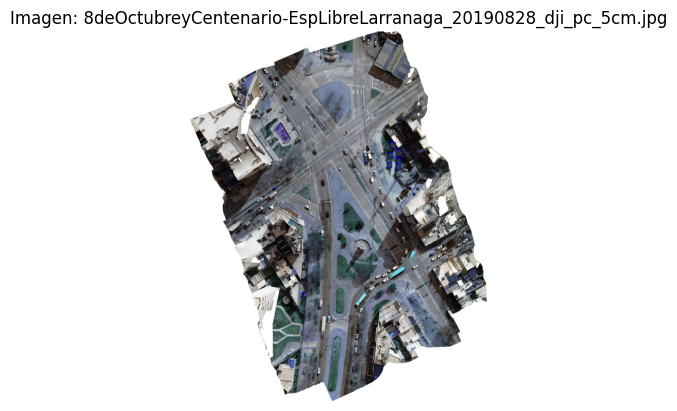

In [6]:
image_name = "8deOctubreyCentenario-EspLibreLarranaga_20190828_dji_pc_5cm"
image_path = imagenes_folder_path / "data" / f"{image_name}.jpg"
coco_annotations = ProcesadorCocoDataset.load_coco_annotations_from_mongodb(field_name="cvat", images_names=[image_name])
VisualizadorCocoDataset.show_anotated_image(image_path=image_path, coco_annotations=coco_annotations)